<a href="https://colab.research.google.com/github/thejayden/IM4483-Mini-Proj/blob/master/im4483_tanjiadian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [9]:
!git clone https://github.com/thejayden/IM4483-Mini-Proj.git

Cloning into 'IM4483-Mini-Proj'...
remote: Enumerating objects: 25507, done.
remote: Total 25507 (delta 0), reused 0 (delta 0), pack-reused 25507
Receiving objects: 100% (25507/25507), 1.01 GiB | 30.48 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (25502/25502), done.


In [60]:
train_dir_cat = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'cat')
train_dir_dog = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'dog')
cat_train_images = os.listdir(train_dir_cat)
dog_train_images = os.listdir(train_dir_dog)

category_cat = []
category_dog = []

for image in cat_train_images:
  category_cat.append(0)
df = pd.DataFrame({
    'filename': cat_train_images,
    'category': category_cat
})

for image in dog_train_images:
  category_dog.append(1)
df2 = pd.DataFrame({
    'filename': dog_train_images,
    'category': category_dog
})

df = df.append(df2)
print(df)

           filename  category
0     cat.10981.jpg         0
1      cat.2580.jpg         0
2     cat.11800.jpg         0
3     cat.11026.jpg         0
4      cat.9559.jpg         0
...             ...       ...
9995   dog.4577.jpg         1
9996   dog.3228.jpg         1
9997   dog.7139.jpg         1
9998    dog.909.jpg         1
9999  dog.12254.jpg         1

[20000 rows x 2 columns]


In [74]:
df_sample = df.sample(frac=0.001)
print(df_sample)

           filename  category
8359   dog.9242.jpg         1
3636   dog.7001.jpg         1
3976  cat.12428.jpg         0
7288   cat.7930.jpg         0
6246    cat.554.jpg         0
4310   dog.5018.jpg         1
6315   dog.5383.jpg         1
266    cat.2729.jpg         0
5018   cat.1701.jpg         0
3726  cat.11163.jpg         0
142    dog.1065.jpg         1
6561  cat.12252.jpg         0
1479   dog.4142.jpg         1
1734   cat.8543.jpg         0
3380  dog.10723.jpg         1
3024   cat.7020.jpg         0
8592   cat.6570.jpg         0
7936   cat.7131.jpg         0
3536   dog.8409.jpg         1
1716  cat.10909.jpg         0


Text(0.5, 0, 'Cat = 0, Dog = 1')

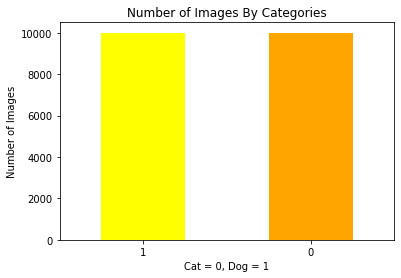

In [75]:
barchart = df['category'].value_counts().plot(kind='bar', color=['yellow','orange'], title='Number of Images By Categories', rot=0)
barchart.set_ylabel("Number of Images")
barchart.set_xlabel("Cat = 0, Dog = 1")

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   